# Ensemble Learning
- Used for both classification and regression
- Aggregate the predictions of many individual predictors to achieve a better prediction accuracy. This is called the `wisdom of the crowd`
- Can combine many types of predictors from different algorithms
- Random Forest is one well-known algorithms where multiple Decision Tree predictors are used
- Hard voting: the class with the majority vote is selected as the prediction
- Soft voting: the class with the highest probability from individual predictors is used
<center><img src='./assets/ensemble_learning.png' width="600" height="800"></center>

Let's try out a simple Ensemble Model built up by multiple classification algorithms. The toy dataset is available with scikit-learn.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

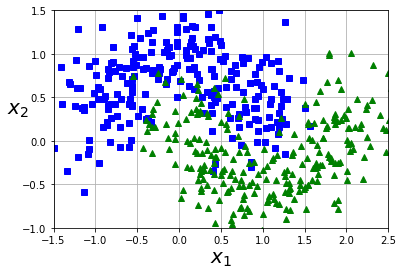

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [11]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [12]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


The VotingClassifier slightly outperforms the remaining classifier

In [15]:
#TODO: visualise decision boundary of VotingClassifier

#### Apply an Ensemble Model on the Titanic dataset

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
final_train = pd.read_csv('data/final_titanic_train.csv')

# create X (features) and y (response)
X = final_train.loc[:, ~final_train.columns.isin(['Survived'])]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
# Try a simple decision tree classifier

log_clf = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')



voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=5000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [23]:
# 98% accuracy on the training data
voting_clf.score(X_train,y_train)

0.8764044943820225

In [27]:
# Perform cross validation score to validate the accuracy of the training
cross_val_score(VotingClassifier(
                    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                    voting='hard'),
                X, y, cv=10).mean()

0.8092259675405742